===== Expense Tracker =====
1. Add Expense
2. Show Monthly Summary
3. Exit


Choose an option:  1
Enter date (YYYY-MM-DD):  2025/06/15
Enter category (e.g., Food, Transport):  food
Enter amount:  500
Enter description:  I had my lunch at Office Cafeteria


✅ Expense added successfully.

===== Expense Tracker =====
1. Add Expense
2. Show Monthly Summary
3. Exit


Choose an option:  1
Enter date (YYYY-MM-DD):  2025/06/15
Enter category (e.g., Food, Transport):  Transport
Enter amount:  200
Enter description:  Bus and Metro Price


✅ Expense added successfully.

===== Expense Tracker =====
1. Add Expense
2. Show Monthly Summary
3. Exit


Choose an option:  1
Enter date (YYYY-MM-DD):  Transport
Enter category (e.g., Food, Transport):  200
Enter amount:  200
Enter description:  Bus and Metro Price


✅ Expense added successfully.

===== Expense Tracker =====
1. Add Expense
2. Show Monthly Summary
3. Exit


Choose an option:  2
Enter month (YYYY-MM):  2025/06



📊 Monthly Summary:
food: ₹500.0
Transport: ₹200.0


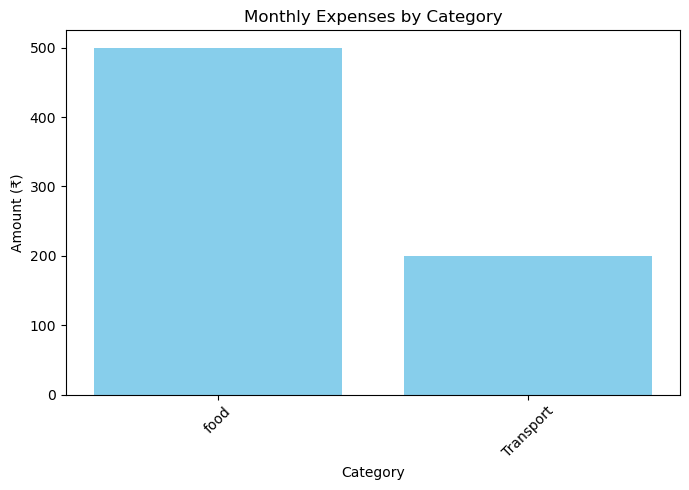

===== Expense Tracker =====
1. Add Expense
2. Show Monthly Summary
3. Exit


In [ ]:
import csv
import matplotlib.pyplot as plt
from datetime import datetime
from collections import defaultdict

FILENAME = "expenses.csv"

def add_expense():
    date = input("Enter date (YYYY-MM-DD): ")
    category = input("Enter category (e.g., Food, Transport, Groceries): ")
    amount = float(input("Enter amount: "))
    description = input("Enter description: ")

    with open(FILENAME, "a", newline="") as file:
        writer = csv.writer(file)
        writer.writerow([date, category, amount, description])
    print("✅ Expense added successfully.\n")

def read_expenses():
    expenses = []
    try:
        with open(FILENAME, "r") as file:
            reader = csv.reader(file)
            for row in reader:
                expenses.append({
                    "date": row[0],
                    "category": row[1],
                    "amount": float(row[2]),
                    "description": row[3]
                })
    except FileNotFoundError:
        pass
    return expenses

def monthly_summary():
    expenses = read_expenses()
    month = input("Enter month (YYYY-MM): ")
    summary = defaultdict(float)

    for e in expenses:
        if e["date"].startswith(month):
            summary[e["category"]] += e["amount"]

    print("\n📊 Monthly Summary:")
    for category, total in summary.items():
        print(f"{category}: ₹{total}")

    return summary

def plot_summary(summary):
    categories = list(summary.keys())
    amounts = list(summary.values())

    plt.figure(figsize=(7, 5))
    plt.bar(categories, amounts, color="skyblue")
    plt.title("Monthly Expenses by Category")
    plt.xlabel("Category")
    plt.ylabel("Amount (₹)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main():
    while True:
        print("===== Expense Tracker =====")
        print("1. Add Expense")
        print("2. Show Monthly Summary")
        print("3. Exit")
        choice = input("Choose an option: ")

        if choice == "1":
            add_expense()
        elif choice == "2":
            summary = monthly_summary()
            plot_summary(summary)
        elif choice == "3":
            print("👋 Exiting... Have a good day!")
            break
        else:
            print("❌ Invalid choice. Try again.\n")

if __name__ == "__main__":
    main()
